# King County House Data Analysis

Student name: Gamze Turan
Student pace: self paced
Scheduled project review date/time: 
Instructor name: Claude Fried
Blog post URL:

#image

## Overview

Real State Agency in King County house buyer and seller

## Business Problem

In [2]:
#image

Real State Agency in King County house buyer and seller

## Data Understanding

First Import the necessary library and start exploring data to determine the data information in order to map the project.

In [55]:
# importing necessary library
import pandas as pd
import sqlite3
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import folium
%matplotlib inline

In [56]:
kc_df = pd.read_csv('data/kc_house_data.csv')
kc_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00000,3,1.00000,1180,5650,1.00000,nan,0.00000,...,7,1180,0.0,1955,0.00000,98178,47.51120,-122.25700,1340,5650
1,6414100192,12/9/2014,538000.00000,3,2.25000,2570,7242,2.00000,0.00000,0.00000,...,7,2170,400.0,1951,1991.00000,98125,47.72100,-122.31900,1690,7639
2,5631500400,2/25/2015,180000.00000,2,1.00000,770,10000,1.00000,0.00000,0.00000,...,6,770,0.0,1933,nan,98028,47.73790,-122.23300,2720,8062
3,2487200875,12/9/2014,604000.00000,4,3.00000,1960,5000,1.00000,0.00000,0.00000,...,7,1050,910.0,1965,0.00000,98136,47.52080,-122.39300,1360,5000
4,1954400510,2/18/2015,510000.00000,3,2.00000,1680,8080,1.00000,0.00000,0.00000,...,8,1680,0.0,1987,0.00000,98074,47.61680,-122.04500,1800,7503


In [57]:
kc_df.shape

(21597, 21)

In [58]:
kc_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,19221.00000,21534.00000,21597.00000,21597.00000,21597.00000,21597.00000,17755.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000
mean,4580474287.77099,540296.57351,3.37320,2.11583,2080.32185,15099.40876,1.49410,0.00760,0.23386,3.40983,7.65792,1788.59684,1970.99968,83.63678,98077.95185,47.56009,-122.21398,1986.62032,12758.28351
std,2876735715.74778,367368.14010,0.92630,0.76898,918.10613,41412.63688,0.53968,0.08682,0.76569,0.65055,1.17320,827.75976,29.37523,399.94641,53.51307,0.13855,0.14072,685.23047,27274.44195
min,1000102.00000,78000.00000,1.00000,0.50000,370.00000,520.00000,1.00000,0.00000,0.00000,1.00000,3.00000,370.00000,1900.00000,0.00000,98001.00000,47.15590,-122.51900,399.00000,651.00000
25%,2123049175.00000,322000.00000,3.00000,1.75000,1430.00000,5040.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1190.00000,1951.00000,0.00000,98033.00000,47.47110,-122.32800,1490.00000,5100.00000
50%,3904930410.00000,450000.00000,3.00000,2.25000,1910.00000,7618.00000,1.50000,0.00000,0.00000,3.00000,7.00000,1560.00000,1975.00000,0.00000,98065.00000,47.57180,-122.23100,1840.00000,7620.00000
75%,7308900490.00000,645000.00000,4.00000,2.50000,2550.00000,10685.00000,2.00000,0.00000,0.00000,4.00000,8.00000,2210.00000,1997.00000,0.00000,98118.00000,47.67800,-122.12500,2360.00000,10083.00000
max,9900000190.00000,7700000.00000,33.00000,8.00000,13540.00000,1651359.00000,3.50000,1.00000,4.00000,5.00000,13.00000,9410.00000,2015.00000,2015.00000,98199.00000,47.77760,-121.31500,6210.00000,871200.00000


In [59]:
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Data cleaning

The best way to start an analyzing is cleaning the data. I went through all the columns and datatypes I 

In [60]:
#inspect each column
for val in kc_df:
    print(kc_df[val].value_counts())
    print()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

6/23/2014     142
6/26/2014     131
6/25/2014     131
7/8/2014      127
4/27/2015     126
             ... 
8/3/2014        1
11/30/2014      1
5/24/2015       1
5/17/2014       1
5/27/2015       1
Name: date, Length: 372, dtype: int64

350000.00000    172
450000.00000    172
550000.00000    159
500000.00000    152
425000.00000    150
               ... 
870515.00000      1
336950.00000      1
386100.00000      1
176250.00000      1
884744.00000      1
Name: price, Length: 3622, dtype: int64

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

2.50000    5377
1.00000    3851
1.75000    3048
2.25000    2047
2.00000    1930
1.50000    1445
2.75000    1185
3.00000     7

In [61]:
kc_df.sqft_basement.unique() # checking the unique value in the column

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [62]:
# dropping row with '?' 
kc_df = kc_df[kc_df.sqft_basement != '?']

In [63]:
#converting sqft_basement column str to float
kc_df['sqft_basement'] = kc_df['sqft_basement'].astype("float")

In [64]:
# encoding zipcode to str
kc_df['zipcode'] = kc_df['zipcode'].astype('str')

In [65]:
# to check the datatypes
kc_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode           object
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Exploring Null  (NaN) Values

In [23]:
# checking if is there any Null values in the dataset
kc_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [27]:
# summary statistics of view column
kc_df.view.describe()

count   21082.00000
mean        0.23333
std         0.76507
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         4.00000
Name: view, dtype: float64

In [28]:
#since the median value is "zero". I decide to replace Null values with median value
kc_df.view = kc_df.view.fillna(value=kc_df.view.median())

In [30]:
# to check how many houses are waterfront
kc_df.waterfront.value_counts()

0.00000    18662
1.00000      142
Name: waterfront, dtype: int64

In [31]:
# there are 142 houses waterfront.So, I replace the Null value with median
kc_df.waterfront = kc_df.waterfront.fillna(value=kc_df.waterfront.median())

In [32]:
kc_df.yr_renovated.describe()

count   17389.00000
mean       82.99195
std       398.48182
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max      2015.00000
Name: yr_renovated, dtype: float64

In [33]:
# median value of the column yr_renovated is also zero.So we can replace the Null value in median value
kc_df.yr_renovated = kc_df.yr_renovated.fillna(value=kc_df.yr_renovated.median())

In [36]:
# Lets check our data null values again
kc_df.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21593,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21594,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21595,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### House Price Distributions 

<AxesSubplot:xlabel='price', ylabel='Count'>

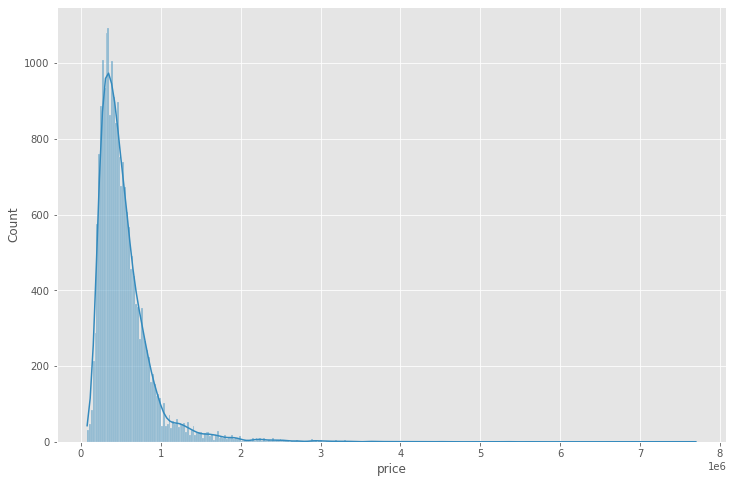

In [53]:
plt.figure(figsize = (12, 8))
sns.histplot(kc_df["price"], kde=True)